In [6]:
%reload_ext autoreload
%autoreload 2

# Autoreload is important, otherwise .py scripts won't be reloaded after changes.

import matplotlib.pyplot as plt
import numpy as np
import data_loader

import common.columns as columns
from common.plots import plot_survived_by_category
from common.selectors import get_survived_counts

from features.title_adder import TitleAdder
from features.person_type_adder import (
  PersonTypeAdder,
  CHILD_TYPE,
  MAN_TYPE,
  WOMAN_TYPE
)

In [13]:
loader = data_loader.DataLoader()
title_adder = TitleAdder()
person_type_adder = PersonTypeAdder()

train_set = loader.get_data()

In [14]:
train_set = title_adder.transform(train_set)

TypeError: tuple indices must be integers or slices, not str

In [12]:
train_set.head()

AttributeError: 'tuple' object has no attribute 'head'

In [18]:
train_set = person_type_adder.transform(train_set)

In [19]:
train_set[columns.PERSON_TYPE].value_counts().sort_index()

child    100
man      526
woman    265
Name: PersonType, dtype: int64

In [20]:
train_set.pivot_table(columns.SURVIVED, index=columns.SEX, columns=columns.P_CLASS)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [21]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train_set[columns.TITLE].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

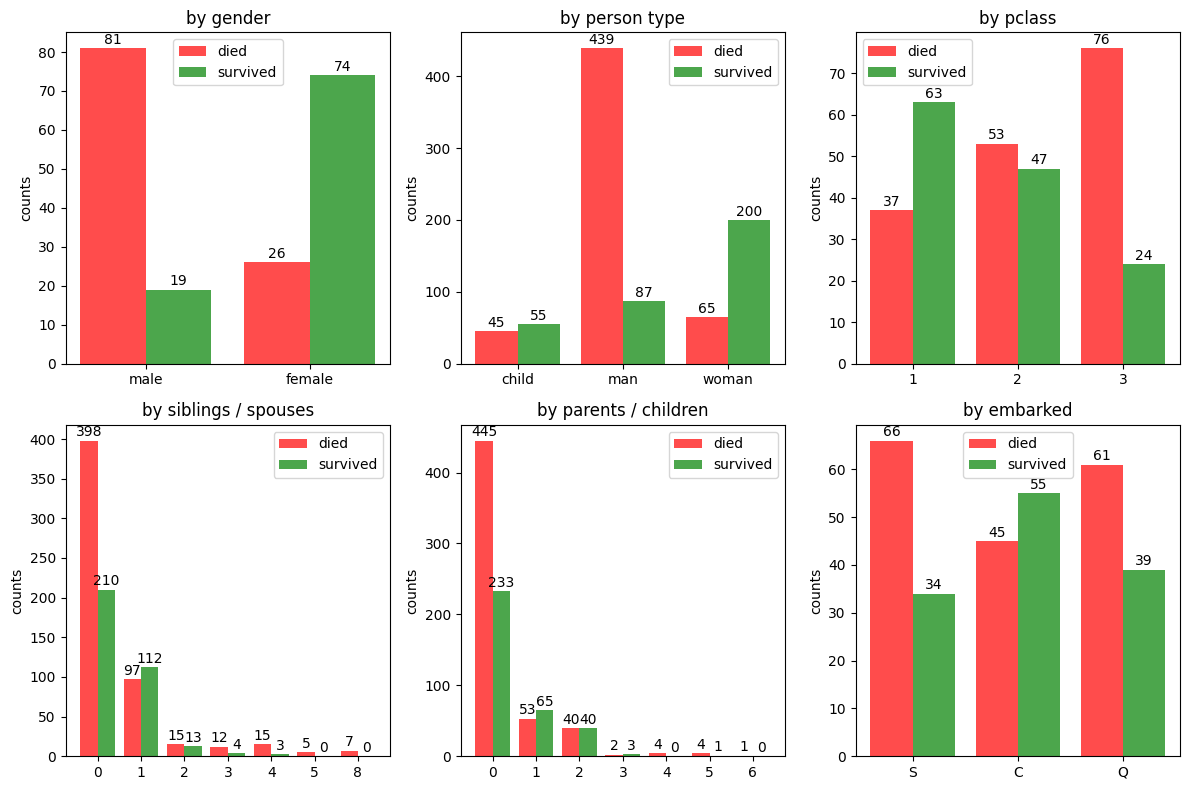

In [23]:
counts_by_gender = get_survived_counts(
  train_set,
  [
    (train_set[columns.SEX] == 'male'),
    (train_set[columns.SEX] == 'female')
  ],
  normalize=True
)

counts_by_person_type = get_survived_counts(
  train_set,
  [
    (train_set[columns.PERSON_TYPE] == CHILD_TYPE),
    (train_set[columns.PERSON_TYPE] == MAN_TYPE),
    (train_set[columns.PERSON_TYPE] == WOMAN_TYPE)
  ],
  # normalize=True
)

counts_by_class = get_survived_counts(
  train_set,
  [train_set[columns.P_CLASS] == x for x in range(1, 4)],
  normalize=True
)

unique_sib_sp_values = np.sort(train_set[columns.SIB_SP].unique())

counts_by_sib_sp = get_survived_counts(
  train_set,
  [train_set[columns.SIB_SP] == x for x in unique_sib_sp_values],
)

unique_parch_values = np.sort(train_set[columns.PARCH].unique())

counts_by_parch = get_survived_counts(
  train_set,
  [train_set[columns.PARCH] == x for x in unique_parch_values],
)

unique_embarked_values = train_set[columns.EMBARKED].dropna().unique()

counts_by_embarked = get_survived_counts(
  train_set,
  [train_set[columns.EMBARKED] == x for x in unique_embarked_values],
  normalize=True
)

plot_survived_by_category([
  ('by gender', train_set[columns.SEX].unique(), counts_by_gender),
  ('by person type', [CHILD_TYPE, MAN_TYPE, WOMAN_TYPE], counts_by_person_type),
  ('by pclass', [1, 2, 3], counts_by_class),
  ('by siblings / spouses', unique_sib_sp_values, counts_by_sib_sp),
  ('by parents / children', unique_parch_values, counts_by_parch),
  ('by embarked', unique_embarked_values, counts_by_embarked),
])



### Experimental analysis (less likely correlations)

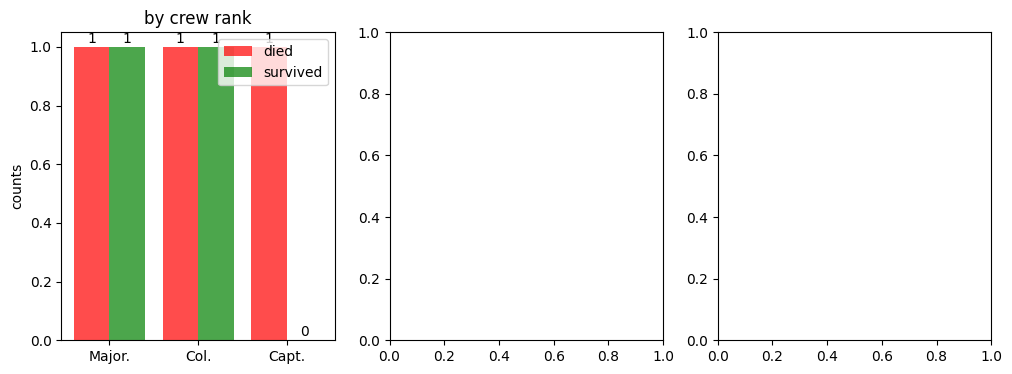

In [24]:
counts_by_crew_rank = get_survived_counts(
  train_set,
  [
    train_set[columns.TITLE] == 'Major.',
    train_set[columns.TITLE] == 'Col.',
    train_set[columns.TITLE] == 'Capt.',
  ]
)

plot_survived_by_category([
  ('by crew rank', ['Major.', 'Col.', 'Capt.'], counts_by_crew_rank)
])

## Conclusions
- 74% females survived, while only 19% of males did
- 83% of adult man died, while only 17% survived
- 75% of class 3 passengers died, while only 37% of 1 class passengers did
- people without spouses / siblings aboard are more likely to die than people with 1 or 2 spouses / siblings
- people without children / parents board are more likely to die than people with parents or children
- crew rank does not seem to affect the likeliness of surviving

Text(0, 0.5, 'fare')

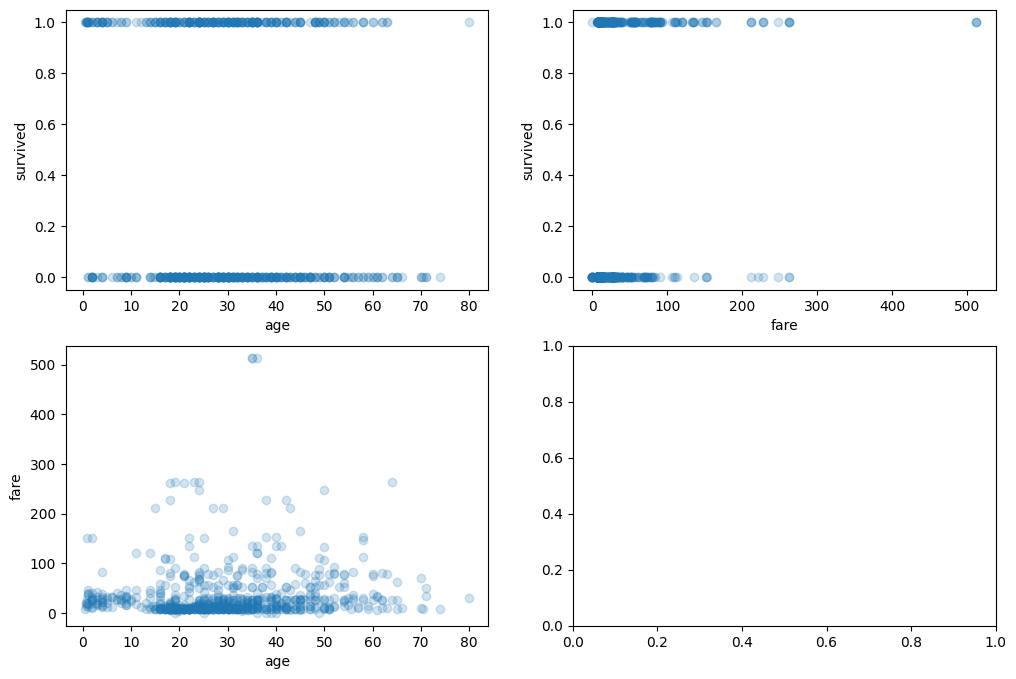

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0][0].scatter(train_set[columns.AGE], train_set[columns.SURVIVED], alpha=0.2)
axes[0][0].set_xlabel('age')
axes[0][0].set_ylabel('survived')

axes[0][1].scatter(train_set[columns.FARE], train_set[columns.SURVIVED], alpha=0.2)
axes[0][1].set_xlabel('fare')
axes[0][1].set_ylabel('survived')

axes[1][0].scatter(train_set[columns.AGE], train_set[columns.FARE], alpha=0.2)
axes[1][0].set_xlabel('age')
axes[1][0].set_ylabel('fare')